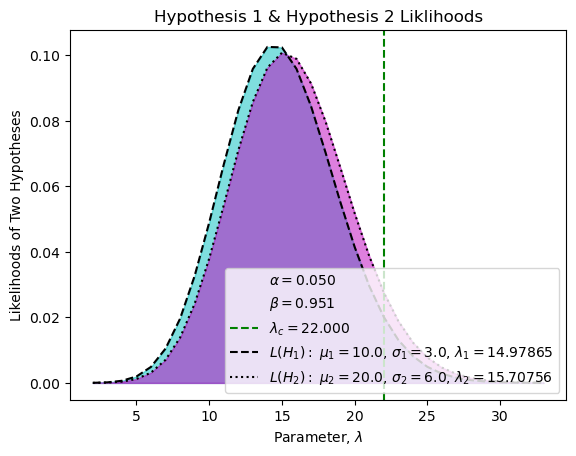

In [25]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math



decay_number = 100000

decay_constant1 = np.random.normal(10.0, 3.0, 10000)
rate1 = np.random.choice(decay_constant1)
distribution1 = random.poisson(rate1, decay_number)
np.savetxt("distribution1.txt", distribution1, fmt='%u')


decay_constant2 = np.random.normal(20.0, 6.0, 10000)
rate2 = np.random.choice(decay_constant2)
distribution2 = random.poisson(rate2, decay_number)
np.savetxt("distribution2.txt", distribution2, fmt='%u')


file1 = open("distribution1.txt", "r")
hypothesis1 = []
for i in file1:
    hypothesis1.append(int(i))
hypothesis1.sort()



file2 = open("distribution2.txt", "r")
hypothesis2 = []
for j in file2:
    hypothesis2.append(int(j))  
hypothesis2.sort()      
hypothesis2 = np.array(hypothesis2)



alpha = 0.05
critical_value = hypothesis1[min(int((1 - alpha)*len(hypothesis1)), len(hypothesis1)-1)]
remaining = np.where( hypothesis2 > critical_value)[0][0]
beta = remaining/len(hypothesis2)



k = 0
Liklihood1, Liklihood2 = 0, 0
H1_Liklihood = []
H2_Liklihood = []


for k in range(0, len(hypothesis1)):

    Liklihood1 = (np.exp( - rate1))*(rate1**hypothesis1[k])/np.math.factorial(hypothesis1[k])
    H1_Liklihood.append(Liklihood1)
    
    Liklihood2 = (np.exp( - rate2))*(rate2**hypothesis1[k])/np.math.factorial(hypothesis1[k])
    H2_Liklihood.append(Liklihood2)

hypothesis1.sort()



fig,ax=plt.subplots()

plt.plot([], [], ' ', label = r'$\alpha = {:.3f}$'.format(alpha))
plt.plot([], [], ' ', label = r'$\beta = {:.3f}$'.format(beta))
plt.axvline(critical_value, linestyle = 'dashed', color='green', label = r'$\lambda_{c} = $' + '${:.3f}$'.format(critical_value))
ax.plot(hypothesis1, H1_Liklihood, label = r'$L(H_1):$ $\mu_1 = 10.0$, $\sigma_1 = 3.0$, $\lambda_1 = {:.5f}$'.format(rate1), color = 'black', linestyle = 'dashed')
ax.plot(hypothesis1, H2_Liklihood, label = r'$L(H_2):$ $\mu_2 = 20.0$, $\sigma_2 = 6.0$, $\lambda_2 = {:.5f}$'.format(rate2), color = 'black', linestyle = 'dotted')
plt.legend(loc = 0)

ax.fill_between(hypothesis1, 0, H1_Liklihood, alpha=0.5, color = 'c')
ax.fill_between(hypothesis1, 0, H2_Liklihood, alpha=0.5, color = 'm')

plt.title("Hypothesis 1 & Hypothesis 2 Liklihoods")
plt.xlabel(r"Parameter, $\lambda$")
plt.ylabel("Likelihoods of Two Hypotheses")
plt.grid(False)
plt.savefig('Likelihoods6.pdf')
plt.show()